# Задание лабораторной работы

- Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  - масштабирование признаков (не менее чем тремя способами);
  - обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
  - обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
  - отбор признаков:
    - один метод из группы методов фильтрации (filter methods);
    - один метод из группы методов обертывания (wrapper methods);
    - один метод из группы методов вложений (embedded methods).

# Выполнение работы

## Текстовое описание датасета

В качестве данных для анализа используется датасет `AutoRu1.csv`, представляющий собой таблицу, содержащую информацию о проданных автомобилях на сайте auto.ru за определенный период.

Описание столбцов в датасете:
- `bodyType` - тип кузова
- `brand` - марка
- `color` - цвет
- `complectation_dict` - комплектация
- `description` - описание
- `engineDisplacement` - объем двигателя
- `enginePower` - мощность автомобиля
- `equipment_dict` - оборудование
- `fuelType` - тип топлива
- `image` - количество фотографий
- `mileage` - пробег
- `modelDate` - год начала производства модели
- `model_info` - информация о модели
- `model_name` - название модели
- `name` - двигатель
- `numberOfDoors` - количество дверей
- `start_date` - публикация объявления
- `priceCurrency` - валюта
- `productionDate` - год выпуска
- `sell_id` - ID продавца
- `super_gen` - характеристики
- `vehicleConfiguration` - конфигурация
- `vehicleTransmission` - тип КПП
- `vendor` - страна произоводителя
- `Владельцы` - количество владельцев
- `Владение` - сколько владеет последний владелец
- `ПТС` - тип документа
- `Привод` - тип привода
- `Руль` - сторона руля
- `Состояние` - на ходу/не на ходу
- `Таможня` - растаможена/Не растаможена
- `price` - цена в рублях
- `price_EUR` - цена в евро
- `price_USD` - цена в долларах

Для анализа в ЛР используются не все признаки.

## Импорт библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import scipy.stats as stats


## Подключение Google Диска для работы с Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Чтение данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BMSTU/mmo/AutoRu1.csv')

In [ ]:
data.head()

,bodyType,brand,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,...,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,price,price_EUR,price_USD
0,Седан,AUDI,97948F,{'id': '0'},Машина на полном ходу\nСостояние хорошее\nС до...,2.3,133.0,{},бензин,5,...,3.0,NaN,ORIGINAL,передний,LEFT,True,True,106000.0,1161.0,1371.0
1,Седан,AUDI,CACECB,{'id': '0'},Продажа от официального дилера KIA - Компания ...,1.8,90.0,"{'condition': True, 'audiosystem-cd': True, 'f...",бензин,7,...,3.0,NaN,ORIGINAL,передний,LEFT,True,True,44000.0,482.0,569.0
2,Седан,AUDI,040001,{'id': '0'},Автомобиль продает Официальный дилер Hyundai. ...,2.6,150.0,"{'airbag-driver': True, 'isofix': True, 'elect...",бензин,11,...,3.0,NaN,DUPLICATE,передний,LEFT,True,True,167000.0,1829.0,2160.0
3,Седан,AUDI,DEA522,{'id': '0'},Продам машину в нормальном состоянии не гнилая...,2.0,101.0,{},бензин,7,...,3.0,NaN,DUPLICATE,передний,LEFT,True,True,135000.0,1478.0,1746.0
4,Седан,AUDI,0000CC,{'id': '0'},Комплектация:\n• Антиблокировочная система\n• ...,2.3,133.0,"{'alloy-wheel-disks': True, 'abs': True, 'whee...",бензин,15,...,2.0,NaN,ORIGINAL,передний,LEFT,True,True,130000.0,1424.0,1681.0


In [ ]:
data.shape

(77449, 34)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77449 entries, 0 to 77448
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              77447 non-null  object 
 1   brand                 77449 non-null  object 
 2   color                 77449 non-null  object 
 3   complectation_dict    77449 non-null  object 
 4   description           74782 non-null  object 
 5   engineDisplacement    77449 non-null  object 
 6   enginePower           77447 non-null  float64
 7   equipment_dict        77449 non-null  object 
 8   fuelType              77449 non-null  object 
 9   image                 77449 non-null  int64  
 10  mileage               77449 non-null  int64  
 11  modelDate             77447 non-null  float64
 12  model_info            77449 non-null  object 
 13  model_name            77449 non-null  object 
 14  name                  77447 non-null  object 
 15  numberOfDoors      

## Первичная обработка данных

Оставим в исходной выборке лишь некоторые признаки:

In [ ]:
data.drop(['complectation_dict', 'equipment_dict', 'image', 'modelDate', 'model_info', 'sell_id', 'price_EUR', 'price_USD', 'enginePower', 'ПТС', 'Владельцы', 'super_gen', 'name', 'vehicleConfiguration', 'description', 'Владение', 'priceCurrency', 'Руль', 'fuelType', 'vehicleTransmission', 'vendor', 'productionDate'], inplace=True, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77449 entries, 0 to 77448
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bodyType            77447 non-null  object 
 1   brand               77449 non-null  object 
 2   color               77449 non-null  object 
 3   engineDisplacement  77449 non-null  object 
 4   mileage             77449 non-null  int64  
 5   model_name          77449 non-null  object 
 6   numberOfDoors       77447 non-null  float64
 7   start_date          77449 non-null  object 
 8   Привод              77447 non-null  object 
 9   Состояние           77449 non-null  bool   
 10  Таможня             77449 non-null  bool   
 11  price               77152 non-null  float64
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 6.1+ MB


Удалим пропуски:

In [ ]:
for column in data.columns:
  if (data[column].isnull().sum() != 0):
    print(column,':',data[column].isnull().sum())

bodyType : 2
numberOfDoors : 2
Привод : 2
price : 297


In [ ]:
data.drop(data[data['price'].isnull()].index, inplace=True)
data.drop(data[data['numberOfDoors'].isnull()].index, inplace=True)

In [ ]:
for column in data.columns:
  if (data[column].isnull().sum() != 0):
    print(column,':',data[column].isnull().sum())

Приведем бинарные свойства к int64:

In [ ]:
data["Состояние"]=data["Состояние"].astype({"Состояние":"int64"})
data["Таможня"]=data["Состояние"].astype({"Состояние":"int64"})

Закодируем признаки:

LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
letype = LabelEncoder()
learrtype = letype.fit_transform(data["bodyType"])
data["bodyType"] = learrtype
data = data.astype({"bodyType":"int64"})

In [ ]:
leeng = LabelEncoder()
learren = leeng.fit_transform(data["engineDisplacement"])
data["engineDisplacement"] = learren
data = data.astype({"engineDisplacement":"int64"})

In [ ]:
lemodel = LabelEncoder()
learrm = lemodel.fit_transform(data["model_name"])
data["model_name"] = learrm
data = data.astype({"model_name":"int64"})

CountEncoder

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [ ]:
ce_CountEncoder1 = ce_CountEncoder()
data["brand"] = ce_CountEncoder1.fit_transform(data['brand'])

In [ ]:
ce_CountEncoder2 = ce_CountEncoder()
data["color"] = ce_CountEncoder2.fit_transform(data['color'])

FrequencyEncoder

In [ ]:
ce_CountEncoder3 = ce_CountEncoder(normalize=True)
data["Привод"] = ce_CountEncoder3.fit_transform(data['Привод'])

In [ ]:
data.head()

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,start_date,Привод,Состояние,Таможня,price
0,102,3630,9721,26,359000,1,4.0,2020-11-13T23:31:09Z,0.503422,1,1,106000.0
1,102,3630,8904,16,204700,1,4.0,2020-11-12T09:13:49Z,0.503422,1,1,44000.0
2,102,3630,21577,32,403000,1,4.0,2020-11-12T10:14:26Z,0.503422,1,1,167000.0
3,102,3630,552,20,197116,1,4.0,2020-11-14T10:13:19Z,0.503422,1,1,135000.0
4,102,3630,8255,26,460222,1,4.0,2020-11-12T08:34:05Z,0.503422,1,1,130000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77150 entries, 0 to 77448
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bodyType            77150 non-null  int64  
 1   brand               77150 non-null  int64  
 2   color               77150 non-null  int64  
 3   engineDisplacement  77150 non-null  int64  
 4   mileage             77150 non-null  int64  
 5   model_name          77150 non-null  int64  
 6   numberOfDoors       77150 non-null  float64
 7   start_date          77150 non-null  object 
 8   Привод              77150 non-null  float64
 9   Состояние           77150 non-null  int64  
 10  Таможня             77150 non-null  int64  
 11  price               77150 non-null  float64
dtypes: float64(3), int64(8), object(1)
memory usage: 9.7+ MB


## Обработка даты и времени

In [ ]:
data[["start_date"]]

,start_date
0,2020-11-13T23:31:09Z
1,2020-11-12T09:13:49Z
2,2020-11-12T10:14:26Z
3,2020-11-14T10:13:19Z
4,2020-11-12T08:34:05Z
...,...
77444,2020-10-08T10:30:52Z
77445,2020-10-20T16:10:26Z
77446,2020-09-17T15:35:22Z
77447,2019-05-14T15:43:20Z


In [ ]:
data['true_date'] = data.apply(lambda x: pd.to_datetime(x['start_date'], format='%Y-%m-%dT%H:%M:%SZ'), axis=1)

In [ ]:
data[["start_date", "true_date"]]

,start_date,true_date
0,2020-11-13T23:31:09Z,2020-11-13 23:31:09
1,2020-11-12T09:13:49Z,2020-11-12 09:13:49
2,2020-11-12T10:14:26Z,2020-11-12 10:14:26
3,2020-11-14T10:13:19Z,2020-11-14 10:13:19
4,2020-11-12T08:34:05Z,2020-11-12 08:34:05
...,...,...
77444,2020-10-08T10:30:52Z,2020-10-08 10:30:52
77445,2020-10-20T16:10:26Z,2020-10-20 16:10:26
77446,2020-09-17T15:35:22Z,2020-09-17 15:35:22
77447,2019-05-14T15:43:20Z,2019-05-14 15:43:20


In [ ]:
data.drop(["start_date"], inplace=True, axis=1)

In [ ]:
data.dtypes

bodyType                       int64
brand                          int64
color                          int64
engineDisplacement             int64
mileage                        int64
model_name                     int64
numberOfDoors                float64
Привод                       float64
Состояние                      int64
Таможня                        int64
price                        float64
true_date             datetime64[ns]
dtype: object

Datetime64 - сложный формат, не будет воспринят библиотеками в мастшабировании, удалим столбец:

In [ ]:
data.drop(["true_date"], inplace=True, axis=1)

## Разделение выборки

In [ ]:
data.describe()

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,Привод,Состояние,Таможня,price
count,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.0,77150.0,7.715000e+04
mean,63.572003,4280.350564,12051.264446,23.733467,123501.991212,533.857485,4.539248,0.437131,1.0,1.0,1.714516e+06
std,55.314399,2745.066569,6869.594395,15.929937,104709.575201,300.052703,0.654107,0.110024,0.0,0.0,2.524490e+06
min,0.000000,226.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.074504,1.0,1.0,2.000000e+04
25%,3.000000,2526.000000,8255.000000,12.000000,28770.250000,297.000000,4.000000,0.422074,1.0,1.0,4.000000e+05
50%,65.000000,3752.000000,9721.000000,20.000000,117000.000000,534.000000,5.000000,0.503422,1.0,1.0,8.000000e+05
75%,102.000000,5802.000000,21577.000000,30.000000,186000.000000,774.000000,5.000000,0.503422,1.0,1.0,1.890000e+06
max,165.000000,10045.000000,21577.000000,100.000000,1000000.000000,1063.000000,5.000000,0.503422,1.0,1.0,7.200000e+07


В качестве целевого признака возьмем признак `price`.

In [ ]:
# DataFrame не содержащий целевой признак
Y = data['price']
X_ALL = data.drop('price', axis=1)

In [ ]:
X_ALL

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,Привод,Состояние,Таможня
0,102,3630,9721,26,359000,1,4.0,0.503422,1,1
1,102,3630,8904,16,204700,1,4.0,0.503422,1,1
2,102,3630,21577,32,403000,1,4.0,0.503422,1,1
3,102,3630,552,20,197116,1,4.0,0.503422,1,1
4,102,3630,8255,26,460222,1,4.0,0.503422,1,1
...,...,...,...,...,...,...,...,...,...,...
77444,60,531,8904,21,88132,878,5.0,0.074504,1,1
77445,60,531,9721,21,190487,878,5.0,0.422074,1,1
77446,60,531,13546,21,120000,878,5.0,0.422074,1,1
77447,60,531,9721,21,90000,878,5.0,0.422074,1,1


In [ ]:
Y

0         106000.0
1          44000.0
2         167000.0
3         135000.0
4         130000.0
           ...    
77444    1098000.0
77445    1130000.0
77446    1300000.0
77447    1250000.0
77448    1170000.0
Name: price, Length: 77150, dtype: float64

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['price'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((61720, 10), (15430, 10))

## Масштабирование признаков

### Масштабирование на основе Z-оценки

In [ ]:
x_col_list = ['bodyType', 'mileage', 'Привод']

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,Привод,Состояние,Таможня
0,0.694724,-0.236918,-0.339216,0.142282,2.249074,-1.775891,-0.824409,0.602518,0.0,0.0
1,0.694724,-0.236918,-0.458147,-0.485471,0.775464,-1.775891,-0.824409,0.602518,0.0,0.0
2,0.694724,-0.236918,1.386661,0.518934,2.669286,-1.775891,-0.824409,0.602518,0.0,0.0
3,0.694724,-0.236918,-1.673947,-0.234370,0.703035,-1.775891,-0.824409,0.602518,0.0,0.0
4,0.694724,-0.236918,-0.552622,0.142282,3.215773,-1.775891,-0.824409,0.602518,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
77145,-0.064577,-1.365859,-0.458147,-0.171594,-0.337794,1.146948,0.704403,-3.295906,0.0,0.0
77146,-0.064577,-1.365859,-0.339216,-0.171594,0.639726,1.146948,0.704403,-0.136853,0.0,0.0
77147,-0.064577,-1.365859,0.217589,-0.171594,-0.033445,1.146948,0.704403,-0.136853,0.0,0.0
77148,-0.064577,-1.365859,-0.339216,-0.171594,-0.319954,1.146948,0.704403,-0.136853,0.0,0.0


In [ ]:
data_cs11_scaled.describe()

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,Привод,Состояние,Таможня
count,7.715000e+04,7.715000e+04,7.715000e+04,7.715000e+04,7.715000e+04,7.715000e+04,7.715000e+04,7.715000e+04,77150.0,77150.0
mean,-9.430924e-17,1.650412e-16,-1.002036e-16,-1.002036e-16,-1.031507e-17,1.178865e-17,-3.241880e-16,1.514842e-15,0.0,0.0
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,0.0,0.0
min,-1.149292e+00,-1.476968e+00,-1.751391e+00,-1.489875e+00,-1.179479e+00,-1.779224e+00,-6.939656e+00,-3.295906e+00,0.0,0.0
25%,-1.095057e+00,-6.390963e-01,-5.526220e-01,-7.365718e-01,-9.047153e-01,-7.893914e-01,-8.244091e-01,-1.368525e-01,0.0,0.0
50%,2.581618e-02,-1.924740e-01,-3.392165e-01,-2.343695e-01,-6.209588e-02,4.749682e-04,7.044028e-01,6.025180e-01,0.0,0.0
75%,6.947241e-01,5.543251e-01,1.386661e+00,3.933834e-01,5.968739e-01,8.003396e-01,7.044028e-01,6.025180e-01,0.0,0.0
max,1.833675e+00,2.100017e+00,1.386661e+00,4.787654e+00,8.370807e+00,1.763510e+00,7.044028e-01,6.025180e-01,0.0,0.0


Построим плотность распределения:

In [ ]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

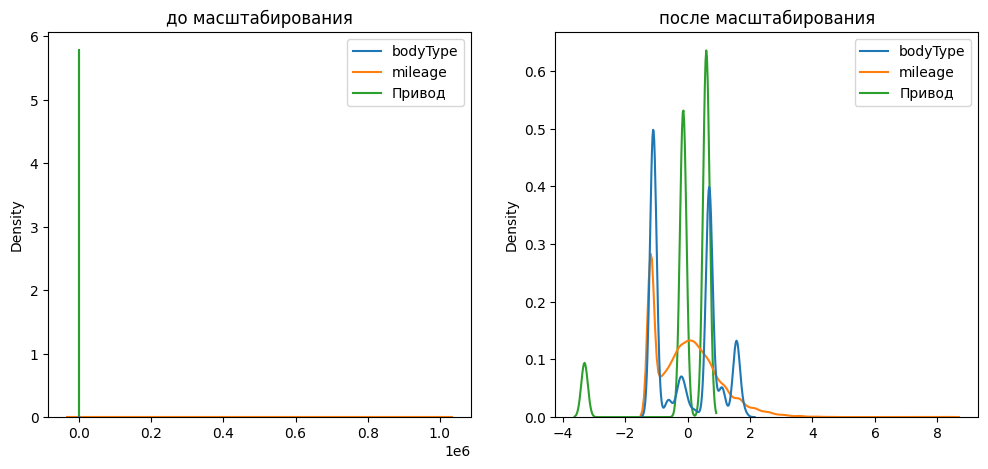

In [ ]:
draw_kde(x_col_list, data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

Обучаем StandardScaler на обучающей выборке и масштабируем обучающую и тестовую выборки:

In [ ]:
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [ ]:
data_cs12_scaled_train.describe()

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,Привод,Состояние,Таможня
count,6.172000e+04,6.172000e+04,6.172000e+04,6.172000e+04,6.172000e+04,6.172000e+04,6.172000e+04,6.172000e+04,61720.0,61720.0
mean,1.634755e-17,-8.231336e-17,8.847247e-17,-6.792291e-17,-3.200436e-17,2.670867e-17,6.932742e-16,7.922805e-16,0.0,0.0
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.0,0.0
min,-1.150408e+00,-1.477060e+00,-1.748237e+00,-1.490006e+00,-1.179151e+00,-1.776897e+00,-6.939543e+00,-3.304003e+00,0.0,0.0
25%,-1.096217e+00,-6.390462e-01,-5.505814e-01,-7.358374e-01,-9.055794e-01,-7.906979e-01,-8.253035e-01,-1.387393e-01,0.0,0.0
50%,2.373964e-02,-1.923485e-01,-3.373740e-01,-2.330586e-01,-6.312733e-02,-1.072401e-03,7.032564e-01,6.020846e-01,0.0,0.0
75%,6.921008e-01,5.545767e-01,1.386901e+00,3.954149e-01,5.988914e-01,8.018801e-01,7.032564e-01,6.020846e-01,0.0,0.0
max,1.830121e+00,2.100530e+00,1.386901e+00,4.794730e+00,8.359510e+00,1.761425e+00,7.032564e-01,6.020846e-01,0.0,0.0


In [ ]:
data_cs12_scaled_test.describe()

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,Привод,Состояние,Таможня
count,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.0,15430.0
mean,-0.010277,0.000790,0.007638,0.007900,-0.005535,-0.007736,-0.005151,-0.008089,0.0,0.0
std,0.995896,1.000876,0.995358,1.005734,0.993918,0.998483,0.999197,1.009797,0.0,0.0
min,-1.150408,-1.477060,-1.690936,-1.490006,-1.179151,-1.780229,-3.882423,-3.304003,0.0,0.0
25%,-1.096217,-0.639046,-0.550581,-0.735837,-0.902529,-0.790698,-0.825303,-0.138739,0.0,0.0
50%,0.023740,-0.192348,-0.337374,-0.233059,-0.066609,-0.001072,0.703256,0.602085,0.0,0.0
75%,0.692101,0.554577,1.386901,0.395415,0.586498,0.778558,0.703256,0.602085,0.0,0.0
max,1.830121,2.100530,1.386901,4.794730,8.359510,1.754762,0.703256,0.602085,0.0,0.0


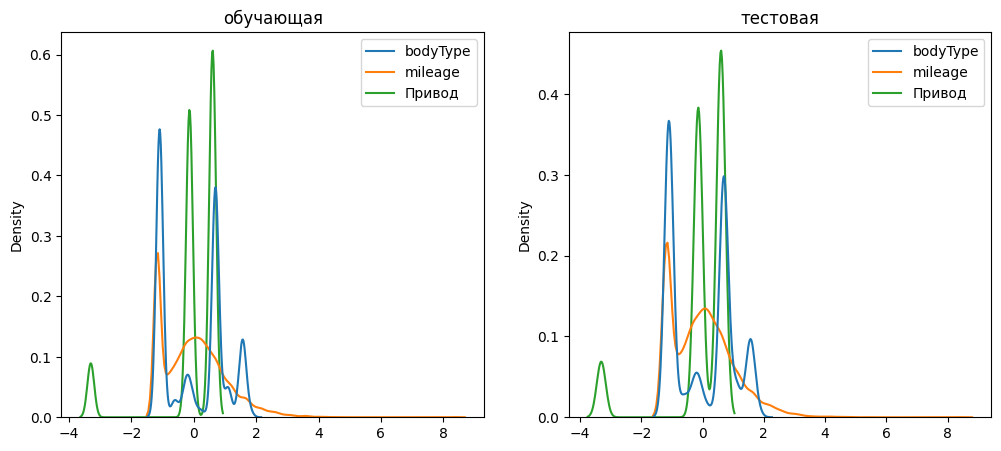

In [ ]:
draw_kde(x_col_list, data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

### Масштабирование Mean Normalization

In [ ]:
class MeanNormalisation:

    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled

    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [ ]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,Привод,Состояние,Таможня
count,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,0.0,0.0
mean,-0.000690,0.000044,0.000487,0.000251,-0.000116,-0.000437,-0.000135,-0.000414,NaN,NaN
std,0.335239,0.279567,0.318671,0.159299,0.104710,0.282536,0.130821,0.256516,NaN,NaN
min,-0.385974,-0.412865,-0.557627,-0.237083,-0.123618,-0.503128,-0.907984,-0.845860,NaN,NaN
25%,-0.367793,-0.178625,-0.175616,-0.117083,-0.094848,-0.223467,-0.107984,-0.035519,NaN,NaN
50%,0.007965,-0.053765,-0.107611,-0.037083,-0.006618,-0.000303,0.092016,0.154140,NaN,NaN
75%,0.232207,0.155014,0.442373,0.062917,0.062382,0.225686,0.092016,0.154140,NaN,NaN
max,0.614026,0.587135,0.442373,0.762917,0.876382,0.497814,0.092016,0.154140,NaN,NaN


In [ ]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [ ]:
data_cs22_scaled_train.describe()

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,Привод,Состояние,Таможня
count,6.172000e+04,6.172000e+04,6.172000e+04,6.172000e+04,6.172000e+04,6.172000e+04,6.172000e+04,6.172000e+04,0.0,0.0
mean,1.249091e-17,-2.539914e-17,3.194679e-17,-8.634269e-18,-3.151508e-18,5.036657e-18,8.878906e-17,1.977823e-16,NaN,NaN
std,3.355136e-01,2.795201e-01,3.189678e-01,1.591170e-01,1.048374e-01,2.826221e-01,1.308432e-01,2.560128e-01,NaN,NaN
min,-3.859745e-01,-4.128645e-01,-5.576268e-01,-2.370833e-01,-1.236181e-01,-5.021863e-01,-9.079844e-01,-8.458599e-01,NaN,NaN
25%,-3.677927e-01,-1.786248e-01,-1.756163e-01,-1.170833e-01,-9.493780e-02,-2.234669e-01,-1.079844e-01,-3.551874e-02,NaN,NaN
50%,7.964905e-03,-5.376483e-02,-1.076106e-01,-3.708328e-02,-6.618050e-03,-3.030819e-04,9.201555e-02,1.541401e-01,NaN,NaN
75%,2.322073e-01,1.550141e-01,4.423732e-01,6.291672e-02,6.278570e-02,2.266272e-01,9.201555e-02,1.541401e-01,NaN,NaN
max,6.140255e-01,5.871355e-01,4.423732e-01,7.629167e-01,8.763819e-01,4.978137e-01,9.201555e-02,1.541401e-01,NaN,NaN


In [ ]:
data_cs22_scaled_test.describe()

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,Привод,Состояние,Таможня
count,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,0.0,0.0
mean,-0.003448,0.000221,0.002436,0.001257,-0.000580,-0.002186,-0.000674,-0.002071,NaN,NaN
std,0.334134,0.279763,0.317485,0.160028,0.104199,0.282191,0.130737,0.258519,NaN,NaN
min,-0.385974,-0.412865,-0.539350,-0.237083,-0.123618,-0.503128,-0.507984,-0.845860,NaN,NaN
25%,-0.367793,-0.178625,-0.175616,-0.117083,-0.094618,-0.223467,-0.107984,-0.035519,NaN,NaN
50%,0.007965,-0.053765,-0.107611,-0.037083,-0.006983,-0.000303,0.092016,0.154140,NaN,NaN
75%,0.232207,0.155014,0.442373,0.062917,0.061486,0.220036,0.092016,0.154140,NaN,NaN
max,0.614026,0.587135,0.442373,0.762917,0.876382,0.495930,0.092016,0.154140,NaN,NaN


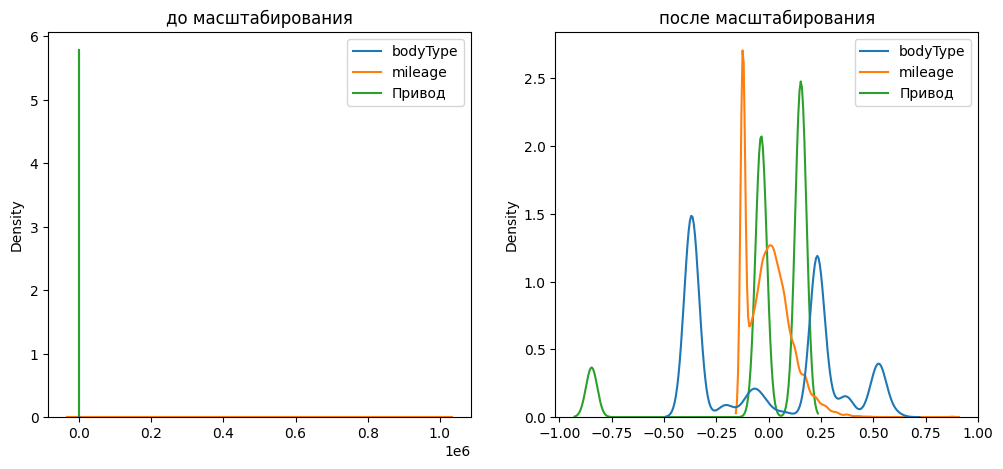

In [ ]:
draw_kde(x_col_list, data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

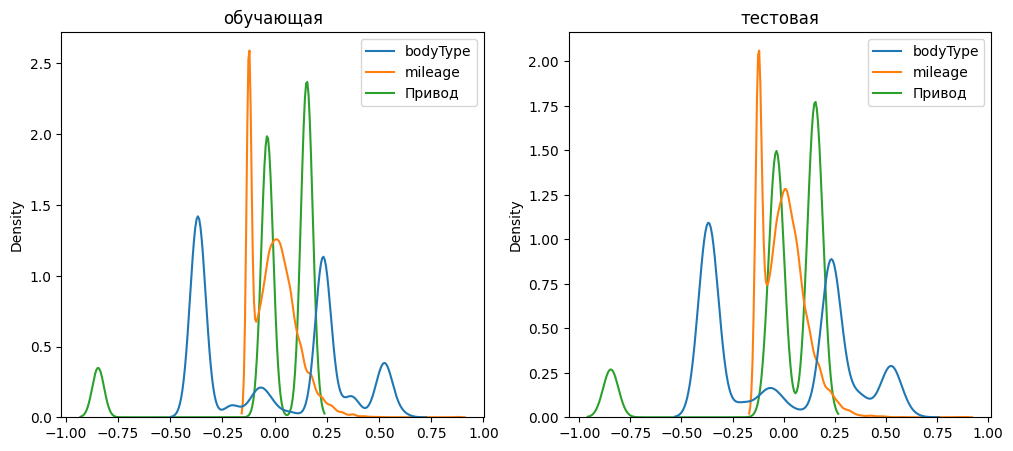

In [ ]:
draw_kde(x_col_list, data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

### MinMax масштабирование

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,bodyType,brand,color,engineDisplacement,mileage,model_name,numberOfDoors,Привод,Состояние,Таможня
count,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.000000,77150.0,77150.0
mean,0.385285,0.412909,0.558114,0.237335,0.123502,0.502218,0.907850,0.845446,0.0,0.0
std,0.335239,0.279567,0.318671,0.159299,0.104710,0.282270,0.130821,0.256516,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.018182,0.234240,0.382010,0.120000,0.028770,0.279398,0.800000,0.810341,0.0,0.0
50%,0.393939,0.359100,0.450016,0.200000,0.117000,0.502352,1.000000,1.000000,0.0,0.0
75%,0.618182,0.567879,1.000000,0.300000,0.186000,0.728128,1.000000,1.000000,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [ ]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

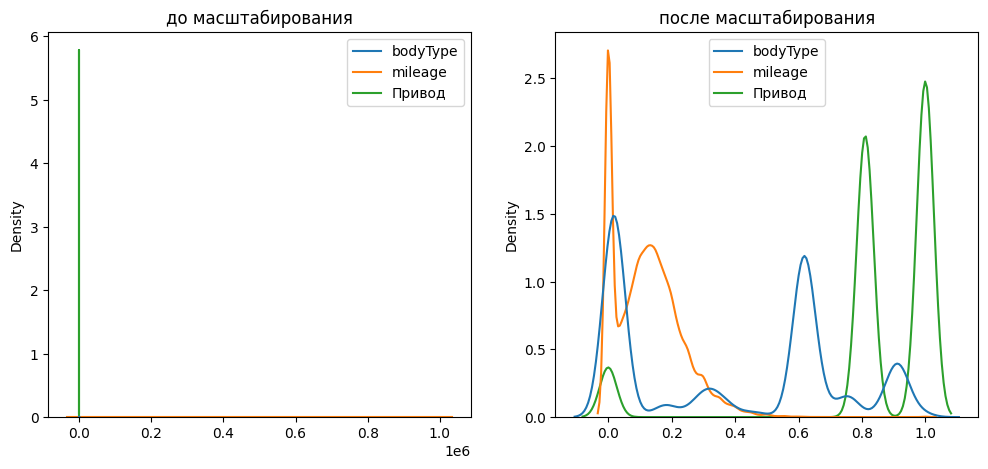

In [ ]:
draw_kde(x_col_list, data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

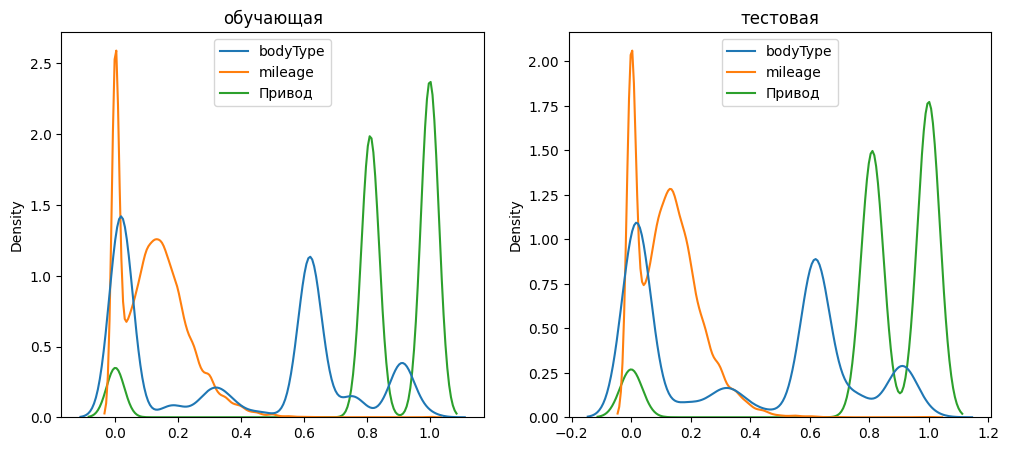

In [ ]:
draw_kde(x_col_list, data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

## Обработка выбросов

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

In [ ]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')

    return lower_boundary, upper_boundary

### Удаление выбросов

Воспользуемся методом OutlierBoundaryType.SIGMA:

<ipython-input-130-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


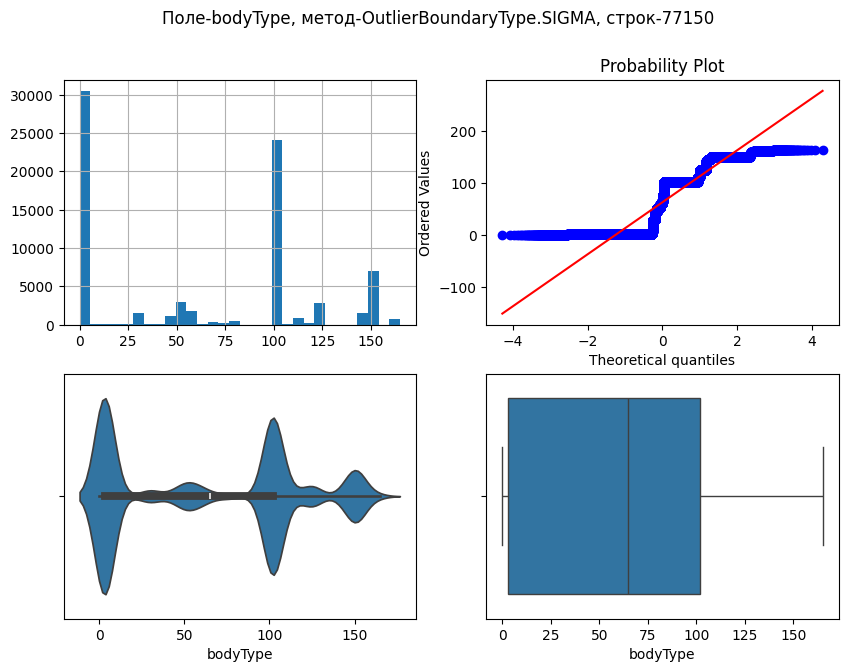

<ipython-input-130-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


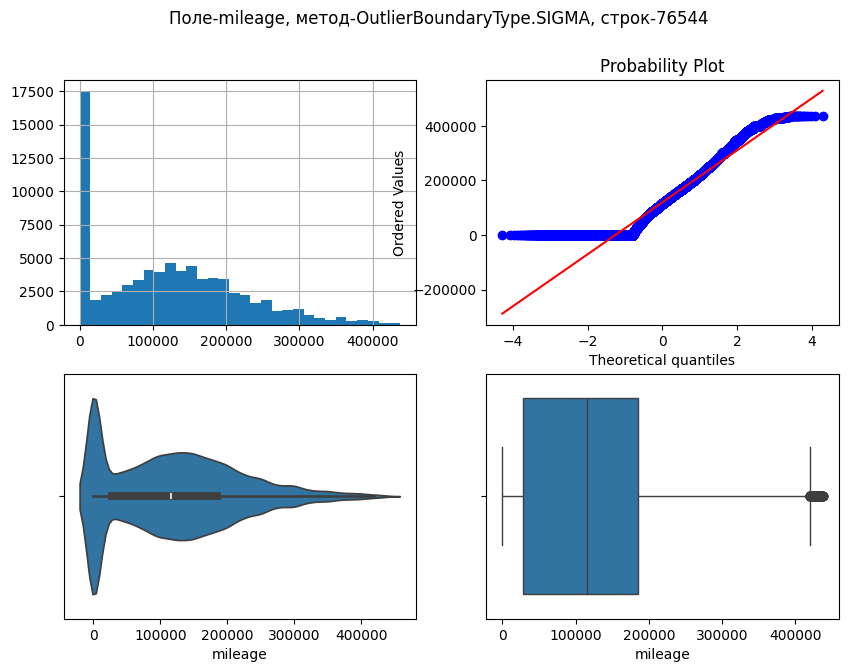

<ipython-input-130-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


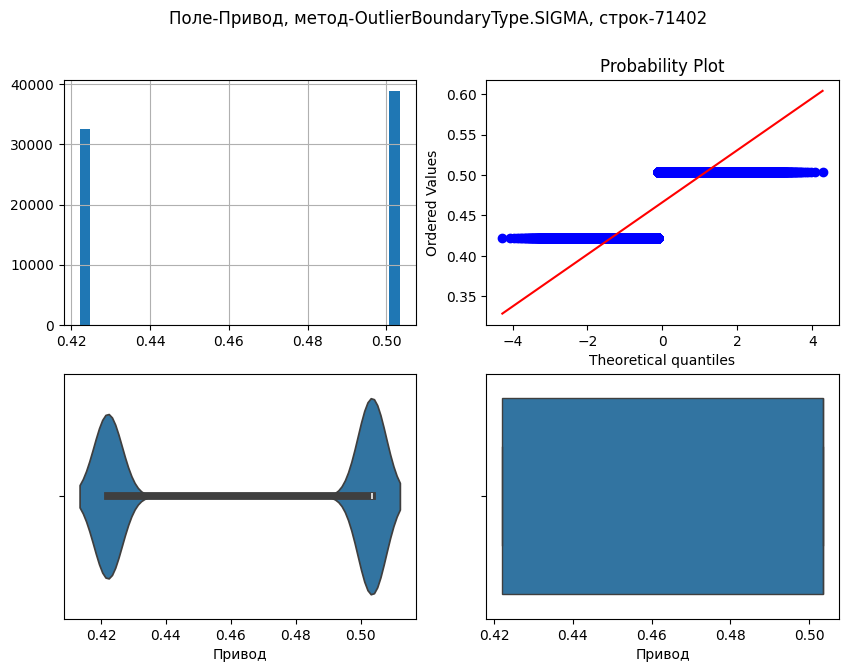

In [ ]:
for col in x_col_list:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, OutlierBoundaryType.SIGMA)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True,
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, OutlierBoundaryType.SIGMA, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

### Замена выбросов

Проведём замену выбросов с помощью метода OutlierBoundaryType.SIGMA:

<ipython-input-130-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


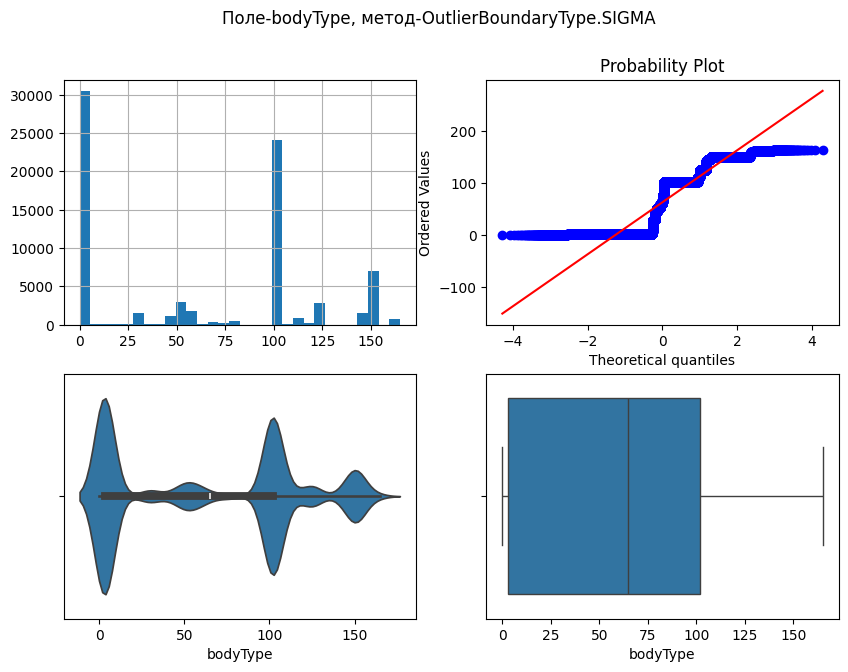

<ipython-input-130-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


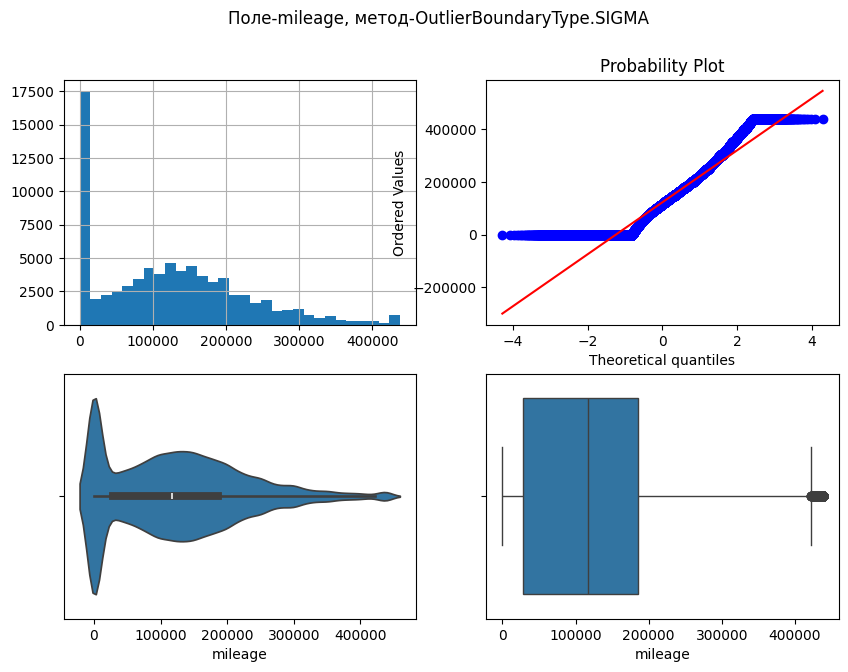

<ipython-input-130-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


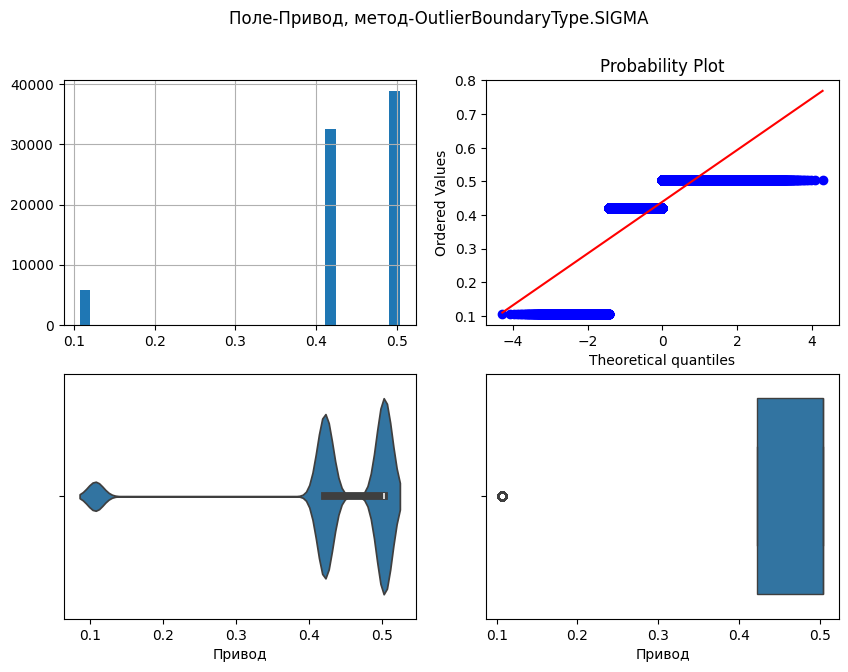

In [ ]:
for col in x_col_list:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, OutlierBoundaryType.SIGMA)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary,
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, OutlierBoundaryType.SIGMA)
        diagnostic_plots(data, col, title)

## Отбор признаков

### Метод фильтрации (filter)

Воспользуемся методом "Удаление константных и псевдоконстантных (почти константных) признаков".

Известно, что в данном датасете `Состояние` и `Таможная`- константные признаки.

In [ ]:
data.Состояние.unique()

array([1])

In [ ]:
data.Таможня.unique()

array([1])

С помощью VarianceThreshold попробуем обнаружить больше таких признаков:

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
selector = VarianceThreshold(threshold=0.15)
selector.fit(data)
# Значения дисперсий для каждого признака
selector.variances_

array([3.05964305e+03, 7.53529280e+06, 4.71907155e+07, 2.53759615e+02,
       1.03791496e+10, 9.00304574e+04, 4.27850375e-01, 1.04191562e-02,
       0.00000000e+00, 0.00000000e+00, 6.37296592e+12])

Удалим константные и псевдоконстантные признаки:

In [ ]:
selector.transform(data)

array([[1.0200e+02, 3.6300e+03, 9.7210e+03, ..., 1.0000e+00, 4.0000e+00,
        1.0600e+05],
       [1.0200e+02, 3.6300e+03, 8.9040e+03, ..., 1.0000e+00, 4.0000e+00,
        4.4000e+04],
       [1.0200e+02, 3.6300e+03, 2.1577e+04, ..., 1.0000e+00, 4.0000e+00,
        1.6700e+05],
       ...,
       [6.0000e+01, 5.3100e+02, 1.3546e+04, ..., 8.7800e+02, 5.0000e+00,
        1.3000e+06],
       [6.0000e+01, 5.3100e+02, 9.7210e+03, ..., 8.7800e+02, 5.0000e+00,
        1.2500e+06],
       [6.0000e+01, 5.3100e+02, 1.3546e+04, ..., 8.7800e+02, 5.0000e+00,
        1.1700e+06]])

### Метод обертывания (wrapper)

Будем использовать алгоритм полного перебора.

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
efs1 = EFS(knn,
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Набор очень большой, применять данный метод к нему очень трудозатратно, ядро не справляется.

### Метод вложений (embedded)

Применим линейную регрессию:

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X_train, y_train)
# Коэффициенты регрессии
list(zip(data.columns.tolist(), e_ls1.coef_))

[('bodyType', -3401.5877013698714),
 ('brand', 285.4364973137541),
 ('color', 10.664895613604326),
 ('engineDisplacement', 52066.22067044952),
 ('mileage', -10.093494367000442),
 ('model_name', -302.6211378391427),
 ('numberOfDoors', 79608.67705532727),
 ('Привод', 1304018.794284346),
 ('Состояние', 0.0),
 ('Таможня', 0.0)]

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X_train, y_train)
list(zip(data.columns.tolist(), sel_e_ls1.get_support()))

[('bodyType', True),
 ('brand', True),
 ('color', True),
 ('engineDisplacement', True),
 ('mileage', True),
 ('model_name', True),
 ('numberOfDoors', True),
 ('Привод', True),
 ('Состояние', False),
 ('Таможня', False)]